# 聚合式階層分群法(Agglomerative Hierarchical Clustering)

##### 先引入我們需要的packages

In [1]:
import os 
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from numpy import random
from tqdm.notebook import tqdm

# MNIST Dataset

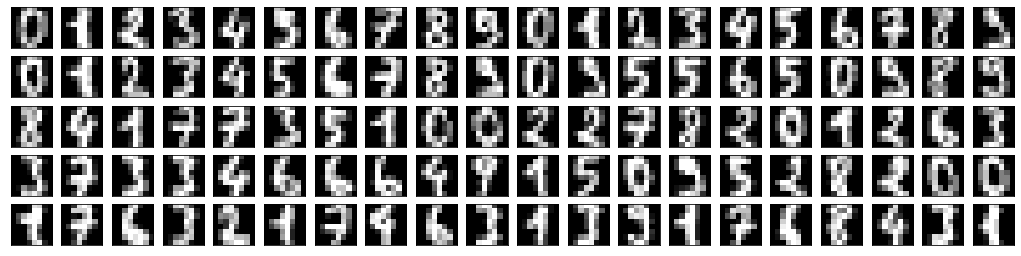

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
X=digits.data/16
y=digits.target
plt.rcParams["figure.figsize"] = (18,18)
plt.gray() 
for i in range(100):
    plt.subplot(20, 20, i + 1)
    plt.imshow(digits.images[i], cmap=plt.cm.gray, vmax=16, interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.show() 

# Principal Component Anlysis

In [3]:
def PCA(X,n_components,N):
    X_center=X-np.mean(X,axis=0)
    W,D,V=np.linalg.svd(X_center.T)
    X_embedded=np.dot(X_center,W[:,:n_components])
    return X_embedded

# Hierarchical Clustering

In [5]:
from scipy.spatial.distance import cdist
N,M=X.shape
sqdist=cdist(X,X,metric='sqeuclidean')
sqdist+=np.diag(np.ones(N)*1e3)
max_iter=2000

# Single Linkage

In [6]:
def single_linkage(sqdist,C_i,C_j):
    return np.min(((sqdist[C_i])[:,C_j]).ravel())
table_1=[]
for i in range(N):
    table_1.append([i])
cluster=np.ones(N).astype(int)
for i in tqdm(range(max_iter)):
    MINIMUM=min(cluster)
    cand=np.array(np.where(cluster==MINIMUM)).flatten()[0]
    choose_index=list(np.array(np.where(cluster!=N)).flatten())
    if(len(choose_index)==10):
        break
    choose_index.remove(cand)
    tmp_dist=np.zeros(len(choose_index))
    k=0
    for j in choose_index:
        tmp_dist[k]=single_linkage(sqdist,table_1[cand],table_1[j])
        k+=1
    merge_index=choose_index[np.argmin(tmp_dist)]
    table_1[merge_index].extend(table_1[cand])
    for q in table_1[cand]:
        table_1[q]=[merge_index]
    cluster[merge_index]+=MINIMUM
    cluster[cand]=N
choose_index_1=choose_index

# Complete Linkage

In [7]:
def complete_linkage(sqdist,C_i,C_j):
    return np.max(((sqdist[C_i])[:,C_j]).ravel())
table_2=[]
for i in range(N):
    table_2.append([i])
cluster=np.ones(N).astype(int)
for i in tqdm(range(max_iter)):
    MINIMUM=min(cluster)
    cand=np.array(np.where(cluster==MINIMUM)).flatten()[0]
    choose_index=list(np.array(np.where(cluster!=N)).flatten())
    if(len(choose_index)==10):
        break
    choose_index.remove(cand)
    tmp_dist=np.zeros(len(choose_index))
    k=0
    for j in choose_index:
        tmp_dist[k]=complete_linkage(sqdist,table_2[cand],table_2[j])
        k+=1
    merge_index=choose_index[np.argmin(tmp_dist)]
    table_2[merge_index].extend(table_2[cand])
    for q in table_2[cand]:
        table_2[q]=[merge_index]
    cluster[merge_index]+=MINIMUM
    cluster[cand]=N
choose_index_2=choose_index

# Average Linkage

In [8]:
def average_linkage(sqdist,C_i,C_j):
    return np.sum(((sqdist[C_i])[:,C_j]).ravel())/(len(C_i)*len(C_j))
table_3=[]
for i in range(N):
    table_3.append([i])
cluster=np.ones(N).astype(int)
for i in tqdm(range(max_iter)):
    MINIMUM=min(cluster)
    cand=np.array(np.where(cluster==MINIMUM)).flatten()[0]
    choose_index=list(np.array(np.where(cluster!=N)).flatten())
    if(len(choose_index)==10):
        break
    choose_index.remove(cand)
    tmp_dist=np.zeros(len(choose_index))
    k=0
    for j in choose_index:
        tmp_dist[k]=average_linkage(sqdist,table_3[cand],table_3[j])
        k+=1
    merge_index=choose_index[np.argmin(tmp_dist)]
    table_3[merge_index].extend(table_3[cand])
    for q in table_3[cand]:
        table_3[q]=[merge_index]
    cluster[merge_index]+=MINIMUM
    cluster[cand]=N
choose_index_3=choose_index

# Plot

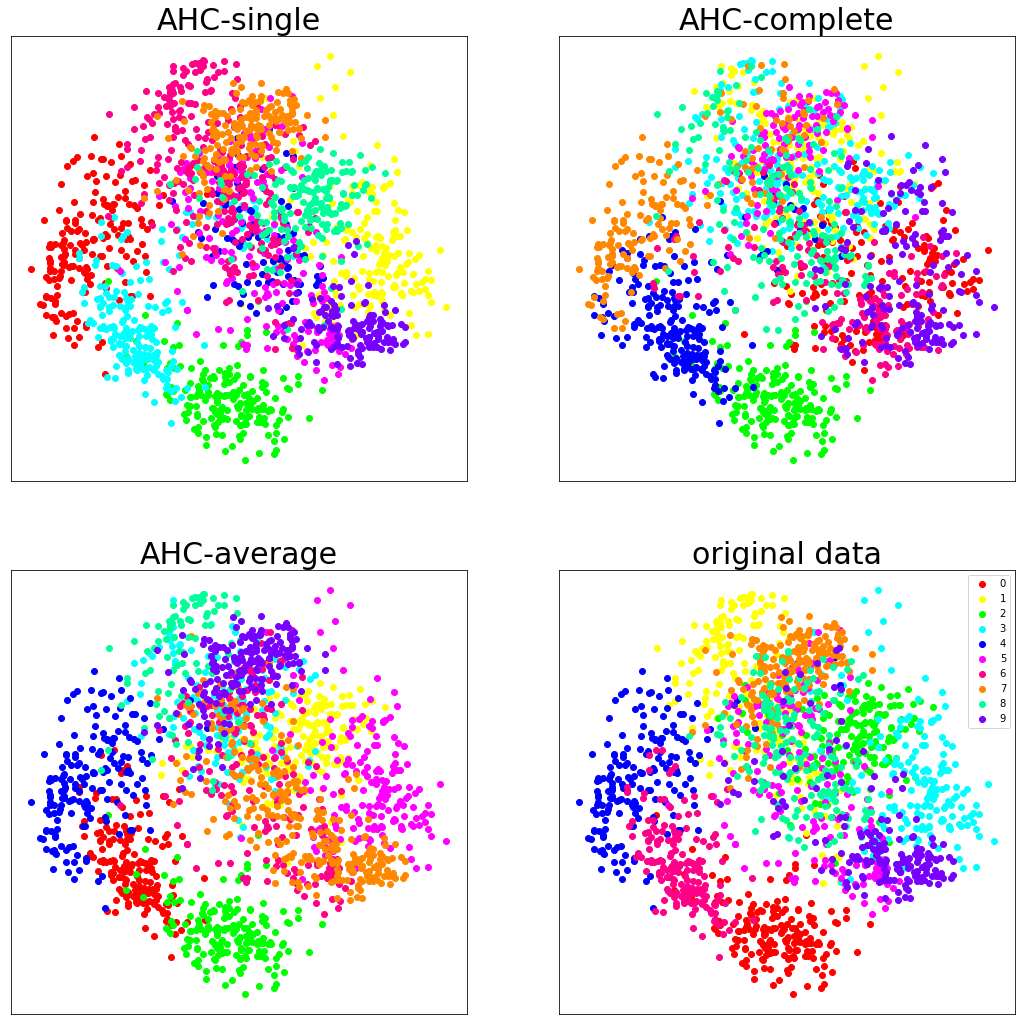

In [9]:
X_embedded=PCA(X,2,N)
color=["#FF0000","#FFFF00","#00FF00","#00FFFF","#0000FF",
       "#FF00FF","#FF0088","#FF8800","#00FF99","#7700FF"]
plt.rcParams["figure.figsize"] = (18,18)
fig , ax = plt.subplots()
plt.subplot(2, 2, 1)
g=0
for p in choose_index_1:
    plt.scatter(X_embedded[table_1[p],0],X_embedded[table_1[p],1],c=color[g])
    g+=1
plt.title("AHC-single",fontsize=30)
plt.xticks([])
plt.yticks([])
plt.subplot(2, 2, 2)
g=0
for p in choose_index_2:
    plt.scatter(X_embedded[table_2[p],0],X_embedded[table_2[p],1],c=color[g])
    g+=1
plt.title("AHC-complete",fontsize=30)
plt.xticks([])
plt.yticks([])
plt.subplot(2, 2, 3)
g=0
for p in choose_index_3:
    plt.scatter(X_embedded[table_3[p],0],X_embedded[table_3[p],1],c=color[g])
    g+=1
plt.title("AHC-average",fontsize=30)
plt.xticks([])
plt.yticks([])
plt.subplot(2, 2, 4)
for i in range(0,10):
    BOOL=(y==i)
    plt.scatter(X_embedded[BOOL,0],X_embedded[BOOL,1],c=color[i],label=i)
plt.title("original data",fontsize=30)
plt.xticks([])
plt.yticks([])
plt.legend(fontsize=10)
plt.show()